In [132]:
# Import pandas
import pandas as pd

In [133]:
# Load in the listings data
df=pd.read_csv('data/listings.csv')

####  Exercise 1: Create a bar chart and dataframe of top 10 Neigborhoods that have the most expensive listsings on average. 
Our goal is to make a chart reflecting the top 10 most expensive Neighborhoods.
This is a little dubious - we assign "expensive" by calculating the average cost of 
an AirBnB in each neighborhood.

1. Make a dataframe that sorts the neighborhood field by decending price.  
1. Use head to cut back top the top 10
1. Use pandas.plot.barh to generate a histogram (see [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.barh.html) wiki for details on pandas.plot.barh)
1. Display the data that you used to create the bar chart as a table with neighborhood and average price as the columns.  You want this to match the pivot that you create in youur dashboard

<Axes: title={'center': 'Average Price of Renting in Each Neighborhood'}, xlabel='average price', ylabel='neighbourhood'>

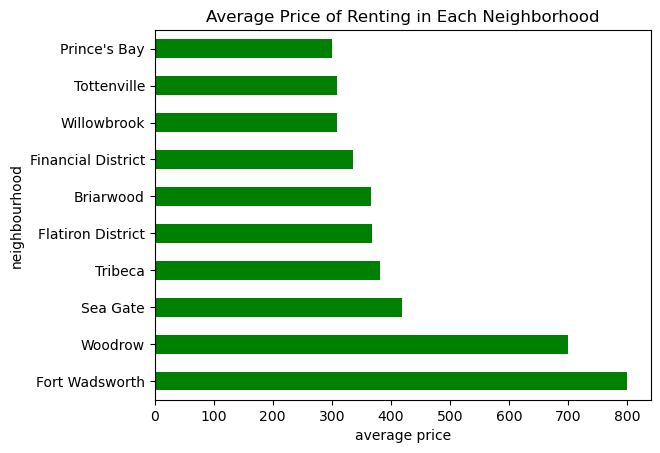

In [134]:
# our goal is to make a chart reflecting the top 10 most expensive Neighborhoods
# This is a little dubious - we assign "expensive" by calculating the average cost of 
# an AirBnB in each neighborhood, then we take the top ten and weight each slice 
# by the average value.
#
# make a dataframe that sorts the neighborhood field by decending price.  
# Use head to cut back top the top 10. Then, use df.plot.barh to generate a histogram.


# Get the average price of each neighborhood
df_avg_price_neighbor = df.groupby('neighbourhood')['price'].mean().round(2)

# Sort the values by descending order and get the top 10
df_top_ten_exp_avg_price_neighbor = df_avg_price_neighbor.sort_values(ascending=False).head(10)

# Plot the histogram
df_top_ten_exp_avg_price_neighbor.plot.barh(color='green', 
                                        xlabel='average price', 
                                        title='Average Price of Renting in Each Neighborhood'
                                        ) 

In [135]:
# Now, display the top 10 datframe you created as a table with columns
# neighbourhood and price

# Reset the index because after the groupby the neighborhood became the index
df_top_ten_exp_avg_price_neighbor.reset_index()


,neighbourhood,price
0,Fort Wadsworth,800.00
1,Woodrow,700.00
2,Sea Gate,418.23
3,Tribeca,381.11
4,Flatiron District,367.42
5,Briarwood,366.16
6,Financial District,335.39
7,Willowbrook,309.00
8,Tottenville,309.00
9,Prince's Bay,300.00


####  Exercise 2: Create a bar chart and dataframe of top 10 Neigborhoods that have the LEAST expensive listsings on average. 

Do the same thing you just did, but get the 10 least expensive neighborhoods.  Sort them from lowest average price to highest.  Bew wure to provide a pivot table.

<Axes: title={'center': 'Average Price of Renting in Each Neighborhood'}, xlabel='average price', ylabel='neighbourhood'>

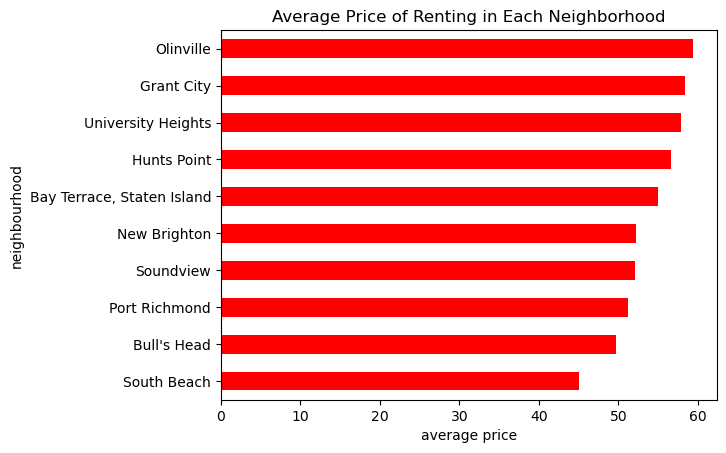

In [136]:
# Here we make the same chart using the bottom 10 Neighborhoods
# by average price.  We sort ascending in this one.
df_top_ten_cheap_avg_price_neighbor = df_avg_price_neighbor.sort_values().head(10)
df_top_ten_cheap_avg_price_neighbor.plot.barh(color='red', 
                                        xlabel='average price', 
                                        title='Average Price of Renting in Each Neighborhood'
                                        ) 

In [137]:
# we also would like to have the corresponding pivot table of the lowest 10

# Reset the index to make the table
df_top_ten_cheap_avg_price_neighbor_table = df_top_ten_cheap_avg_price_neighbor.reset_index().copy()

# Generate the pivot table (need to include index for table to group by and values to aggregate on)
p_table = pd.pivot_table(df_top_ten_cheap_avg_price_neighbor_table, 
                         index='neighbourhood', 
                         values='price'
                        )

p_table

,price
neighbourhood,
"Bay Terrace, Staten Island",55.00
Bull's Head,49.67
Grant City,58.40
Hunts Point,56.58
New Brighton,52.25
Olinville,59.43
Port Richmond,51.22
Soundview,52.06
South Beach,45.00


#  Now make all four widgets (the two charts and the two dataframes) in a Tableau dashboard!